Import Libraries

In [1]:
# Import Libraries
import json
import nltk
import time
import random
import string
import numpy as np
import pandas as pd
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Flatten, Dense, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
# import StemmerFactory class
from sklearn.model_selection import train_test_split
# Mengunduh resource punkt dari NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
# Load Dataset JSON
with open('DatasetFinal.json', 'r') as f:
    dataset = json.load(f)
# Inisialisasi variabel
tags = []  # Data tag
inputs = []  # Data input atau pattern
responses = {}  # Data respon
words = []  # Data kata
classes = []  # Data kelas atau tag
documents = []  # Data dokumen
ignore_words = ['?', '!']  # Karakter yang akan diabaikan

# Iterasi melalui intents dalam JSON
for intent in dataset:
    if 'intent' in intent and 'patterns' in intent and 'response' in intent:
        responses[intent['intent']] = intent['response']  # Menyimpan respons berdasarkan intent

        for pattern in intent['patterns']:
            inputs.append(pattern)
            tags.append(intent['intent'])

            # Tokenisasi pola
            w = nltk.word_tokenize(pattern)
            words.extend(w)
            documents.append((w, intent['intent']))

            # Tambahkan intent ke dalam kelas jika belum ada
            if intent['intent'] not in classes:
                classes.append(intent['intent'])
    else:
        print(f"Kesalahan struktur pada intent: {intent}")

# Membuat DataFrame dari data yang sudah diproses
data = pd.DataFrame({"patterns": inputs, "tags": tags})

# Menampilkan beberapa baris pertama DataFrame
print(data.head())
print(len(data))


                                            patterns             tags
0  Apa saja peralatan yang wajib dibawa saat mend...  Peralatan Wajib
1   Barang apa saja yang harus ada di tas pendakian?  Peralatan Wajib
2  Apa saja perlengkapan yang tidak boleh terlupa...  Peralatan Wajib
3  Peralatan apa yang perlu dibawa saat mendaki g...  Peralatan Wajib
4  Apa barang yang harus dibawa untuk pendakian g...  Peralatan Wajib
190


Preprocessing The Data



1.   Remove Punctuations



In [6]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
print(data.head())

                                            patterns             tags
0  apa saja peralatan yang wajib dibawa saat mend...  Peralatan Wajib
1    barang apa saja yang harus ada di tas pendakian  Peralatan Wajib
2  apa saja perlengkapan yang tidak boleh terlupa...  Peralatan Wajib
3  peralatan apa yang perlu dibawa saat mendaki g...  Peralatan Wajib
4  apa barang yang harus dibawa untuk pendakian g...  Peralatan Wajib


2. Lemmatization: Converting words to their base or root form.



In [7]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data['patterns'] = [stemmer.stem(sentence) for sentence in data['patterns']]
print(len(words))

1613


In [8]:
print(data.head())

                                            patterns             tags
0     apa saja alat yang wajib bawa saat daki gunung  Peralatan Wajib
1         barang apa saja yang harus ada di tas daki  Peralatan Wajib
2  apa saja lengkap yang tidak boleh lupa saat hi...  Peralatan Wajib
3          alat apa yang perlu bawa saat daki gunung  Peralatan Wajib
4       apa barang yang harus bawa untuk daki gunung  Peralatan Wajib


In [9]:
all_words = ' '.join(data['patterns']).split()
unique_words = set(all_words)
a = len(unique_words)
for word in unique_words:
    print(word)
print("Jumlah kata unik dalam data:", a)

nali
udara
istiadat
siap
ritual
pilih
biasa
masyarakat
temu
kencang
tinggal
lagi
hemat
tambah
alternatif
total
pandu
cukup
ketemu
nonhalal
guide
ya
air
hindar
yang
dengan
pantau
area
ambil
hipotermia
spiritual
milik
dingin
hari
ada
sejarah
bahan
dekat
malam
bawa
ngerti
keluar
perilaku
hujan
saat
kamu
hormat
sebab
sangat
salah
lindung
dapat
jalan
sampai
longsor
buruk
daki
sekali
dong
biaya
bagi
kondisi
informasi
boleh
hadap
ekstrem
awal
kabarselamat
tari
sulit
masih
tahu
estimasi
capai
liar
transportasi
efektif
sore
suhu
basecamp
rendah
percaya
tidur
sering
laku
mereka
pengaruh
angin
tandatanda
tahan
gunung
antara
nggak
sesuatu
khas
dampak
lokal
tumbuh
cegah
acara
kabut
alam
sedikit
jaga
perhati
kurang
itu
saya
antisipasi
sekitar
kerinci
rasa
atas
naik
bingung
bagus
langgar
panjang
bisa
ijen
di
canggih
asalusul
kira
mula
wisatawan
bantu
kita
tingkat
agar
aman
tradisi
arti
pada
aktivitas
banyak
banget
kenal
tunjuk
oleh
atau
jejak
bahaya
tenda
lebih
jumpa
tebal
benar
perlu
iya
petik
oke
c

3.   Tokenization



In [10]:
# Tokenize the data (Tokenisasi Data)
vocabulary = 500
tokenizer = Tokenizer(num_words=vocabulary, oov_token="<OOV>")
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[7, 17, 20, 4, 35, 18, 10, 3, 2],
 [36, 7, 17, 4, 14, 11, 6, 46, 3],
 [7, 17, 47, 4, 80, 69, 107, 10, 15],
 [20, 7, 4, 24, 18, 10, 3, 2],
 [7, 36, 4, 14, 18, 12, 3, 2],
 [7, 17, 20, 55, 4, 14, 18, 10, 15, 6, 2],
 [7, 17, 36, 4, 35, 18, 6, 46, 10, 108, 2],
 [7, 17, 47, 4, 24, 12, 3, 2, 27, 42],
 [7, 36, 70, 4, 14, 18, 10, 3, 2],
 [47, 7, 17, 4, 35, 11, 56, 46, 3, 2],
 [7, 17, 20, 4, 35, 18, 10, 3, 2],
 [36, 7, 17, 4, 14, 11, 6, 46, 3],
 [7, 17, 47, 4, 80, 69, 107, 10, 15],
 [20, 7, 4, 24, 18, 10, 3, 2],
 [7, 36, 4, 14, 18, 12, 3, 2],
 [7, 17, 20, 55, 4, 14, 18, 10, 15, 6, 2],
 [7, 17, 36, 4, 35, 18, 6, 46, 10, 108, 2],
 [7, 17, 47, 4, 24, 12, 3, 2, 27, 42],
 [7, 36, 70, 4, 14, 18, 10, 3, 2],
 [47, 7, 17, 4, 35, 11, 56, 46, 3, 2],
 [5, 8, 43, 81, 48, 19, 71, 6, 2],
 [7, 4, 14, 49, 82, 19, 170, 10, 3],
 [9, 19, 2, 13, 171, 27, 50],
 [5, 57, 19, 83, 10, 3, 2],
 [7, 172, 19, 83, 4, 14, 173, 10, 15],
 [9, 33, 6, 2, 44, 72, 45, 84, 174, 175],
 [5, 8, 176, 58, 85, 10, 3, 2],
 [7, 4, 24, 177, 

4.    Apply Padding


In [11]:
max_len = 100
print("Max length:\n\n", max_len)
# Melakukan proses padding pada data
X_trainpad = pad_sequences(train, maxlen=max_len, padding='post', truncating='post')
# Menampilkan hasil padding
print(X_trainpad)

Max length:

 100
[[  7  17  20 ...   0   0   0]
 [ 36   7  17 ...   0   0   0]
 [  7  17  47 ...   0   0   0]
 ...
 [  5   8 161 ...   0   0   0]
 [  9  32   3 ...   0   0   0]
 [  5   8 308 ...   0   0   0]]


5.   Encoding the Outputs


In [12]:
le = LabelEncoder()

# Mengonversi label kategori menjadi angka
Tags = le.fit_transform(data['tags'])

# Menampilkan hasil encoding
print("Encoded labels:", Tags)

# Menampilkan label asli yang terhubung dengan angka
print("Original tags:", le.classes_)  # Menampilkan kategori yang di-encode menjadi angka
output_length = len(le.classes_)


Encoded labels: [12 12 12 12 12 12 12 12 12 12 10 10 10 10 10 10 10 10 10 10  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2 13 13 13 13 13 13 13 13 13 13 14 14 14 14  5  5  5  5  5 15
 15 15 15 15  1  1  1  1  1  6  6  6  6  6  4  4  4  4  4  8  8  8  8  8
  8  8  8  8  8  3  3  3  3  3  3  3  3  3  3 16 16 16 16 16 16 16 16 16
 16  7  7  7  7  7  7  7  7  7  7  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9 11 11 11 11 11 11 11 11 11 11]
Original tags: ['Budaya' 'Confirmation' 'Cuaca di Gunung' 'Dehidrasi' 'Feedback'
 'Goodbye' 'Help' 'Hewan Liar' 'Hipotermia' 'Jalur dan Waktu Pendakian'
 'Kebutuhan' 'Komunitas Pendaki' 'Peralatan Wajib' 'Persiapan cost'
 'Salam' 'Thank You' 'Tumbuhan liar']


In [11]:
for pattern, label in zip(data['patterns'], Tags):
    print(f'Pattern: {pattern} | Encoded Tag: {label} | Original Tag: {le.inverse_transform([label])[0]}')

Pattern: apa saja alat yang wajib bawa saat daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: barang apa saja yang harus ada di tas daki | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja lengkap yang tidak boleh lupa saat hiking | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: alat apa yang perlu bawa saat daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa barang yang harus bawa untuk daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja alat penting yang harus bawa saat hiking di gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja barang yang wajib bawa di tas saat naik gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa saja lengkap yang perlu untuk daki gunung dengan aman | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: apa barang utama yang harus bawa saat daki gunung | Encoded Tag: 10 | Original Tag: Kebutuhan
Pattern: lengkap apa saja yang wajib ada dalam tas daki gunung | Encode

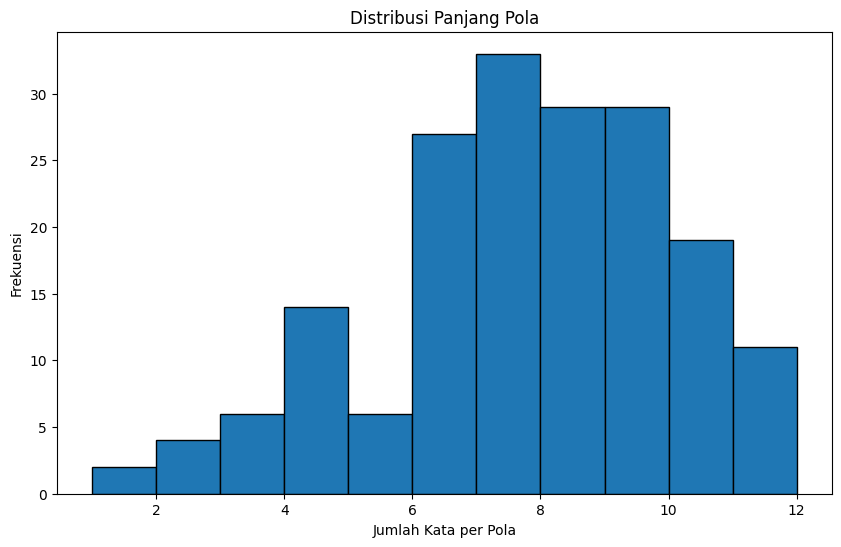

In [13]:
# Hitung panjang pola dalam dataset
pattern_lengths = [len(pattern.split()) for intent in dataset for pattern in intent["patterns"]]

plt.figure(figsize=(10, 6))
plt.hist(pattern_lengths, bins=range(1, max(pattern_lengths) + 1), edgecolor='black')
plt.title("Distribusi Panjang Pola")
plt.xlabel("Jumlah Kata per Pola")
plt.ylabel("Frekuensi")
plt.show()


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_trainpad, Tags, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:",y_val.shape)

Shape of X_train: (144, 100)
Shape of X_val: (36, 100)
Shape of y_train: (144,)
Shape of y_test: (36,)


# Saving the Model
After completing the text processing in five stages, we can save the text processing model using the pickle format.

# Modeling with LSTM Algorithm


In [14]:
# Creating the model (Membuat Modelling)
i = Input(shape=(max_len,))
x = Embedding(vocabulary, 50)(i)
x = Bidirectional(LSTM(16, return_sequences=True, recurrent_dropout=0.5,recurrent_regularizer=l2(0.01)))(x)
x = Flatten()(x)
x = Dropout(0.8)(x)
x = Dense(output_length, activation="softmax", kernel_regularizer=l2(0.01))(x)

model  = Model(i,x) 
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.007), metrics=['accuracy'])

checkpoint = ModelCheckpoint('best_model_1.keras', monitor='val_accuracy', 
                            save_best_only=True, mode='max', verbose=1)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 50)        │        25,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100, 32)        │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │        51,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,792 (331.22 KB)

 Trainable params: 84,792 (331.22 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[checkpoint]
)
# Mendapatkan akurasi tertinggi di training dan validation
max_train_acc = max(history.history['accuracy'])  # Akurasi tertinggi selama pelatihan
max_val_acc = max(history.history['val_accuracy'])  # Akurasi tertinggi selama validasi
average_val_acc = np.mean(history.history['val_accuracy']) # Akurasi

print(f"Akurasi tertinggi di training: {max_train_acc}")
print(f"Akurasi tertinggi di validation: {max_val_acc}")
print(f"Akurasi rata rata di validation: {average_val_acc}")

Epoch 1/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1445 - loss: 3.3595
Epoch 1: val_accuracy improved from -inf to 0.19444, saving model to best_model_1.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.1473 - loss: 3.3650 - val_accuracy: 0.1944 - val_loss: 3.3620
Epoch 2/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1100 - loss: 3.3370
Epoch 2: val_accuracy did not improve from 0.19444
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1058 - loss: 3.3418 - val_accuracy: 0.1944 - val_loss: 3.2859
Epoch 3/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1758 - loss: 3.2611
Epoch 3: val_accuracy did not improve from 0.19444
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1774 - loss: 3.2522 - val_accuracy: 0.1944 - val_loss: 3.3803
Epoch 4/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1654 - loss: 3.1959
Epoch 4: val_accuracy improved from 0.19444 to 0.22222, saving model to best_model_1.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - 

In [17]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)
print("Tokenizer saved as 'tokenizer.pickle'")

with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(le, handle)
print("Label encoder saved as 'label_encoder.pickle'")

Tokenizer saved as 'tokenizer.pickle'
Label encoder saved as 'label_encoder.pickle'


In [13]:
model = load_model('best_model_1.keras')



In [14]:
def predict_tag(text, model):
    text = [letters.lower() for letters in text if letters not in string.punctuation]
    text = ''.join(text)
    print(f'After Remove : {text}')
    text = stemmer.stem(text)
    print(f'After Stem : {text}')
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    
    # Prediksi
    prediction = model.predict(padded_seq)
    
    # Menemukan index dengan probabilitas tertinggi
    predicted_index = np.argmax(prediction, axis=1)[0]
    
    # Mengonversi index kembali ke tag asli
    predicted_tag = le.inverse_transform([predicted_index])[0]
    
    print(predicted_tag)
    return predicted_tag

# Fungsi untuk mendapatkan tag berdasarkan index

In [ ]:

user_input = input("Masukkan pertanyaan: ")
predicted_tag = predict_tag(user_input, model)
Intent_print = predicted_tag
if Intent_print ==  "Cuaca di Gunung"  or Intent_print == "Budaya" or Intent_print == "Jalur dan Waktu Pendakian" or Intent_print == "Komunitas Pendaki":
    print("Pilihlah Subject :\n")
    print("1. Gunung Rinjani :\n")
    print("2. Gunung Bromo :\n")
    print("3. Gunung Merbabu :\n")
    print("4. Gunung Prau :\n")
    print("5. Gunung Ciremai :\n")
    print("6. Gunung Ijen :\n")
    print("7. Gunung Kerinci :\n")
    nomor_gunung = int(input("masukkan nomor gunung: "))
    dictionarty_gunung ={1:"Gunung Rinjani",2:"Gunung Bromo",3:"Gunung Merbabu",4:"Gunung Prau",5:"Gunung Ciremai",6:"Gunung Ijen",7:"Gunung Kerinci"}
    if Intent_print == "Budaya":
        if nomor_gunung >= 1 and nomor_gunung <=7:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for response in item["response"]:
                        if response == dictionarty_gunung[nomor_gunung]:
                            print(item["response"][response])
        else:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for response in item["response"]:
                        print(f"{response}\n")
                        print(f"{item["response"][response]}\n")
    else:
        if nomor_gunung >= 1 and nomor_gunung <=7:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for mountain in item["response"]:
                        if mountain == dictionarty_gunung[nomor_gunung]:
                            print(mountain)
                            for response in item["response"][mountain]:
                                print(f"{response} : {item["response"][mountain][response]}")
        else:
            for item in dataset:
                if item["intent"] == Intent_print:
                    print("\nResponses:")
                    for mountain in item["response"]:
                        print("\n\n")
                        print(mountain)
                        print("\n")
                        for response in item["response"][mountain]:
                            print(f"{response} : {item["response"][mountain][response]}\n")
    
elif Intent_print == "Salam" or Intent_print == "Goodbye" or Intent_print == "Thank You" or Intent_print == "Confirmation" or Intent_print == "Help" or Intent_print == "Feedback": 
    for item in dataset:
        if item["intent"] == Intent_print:
            print("\nResponses:")
            random_response = random.choice(item["response"])
            print(f'{random_response}')

elif Intent_print == "Kebutuhan":
    for item in dataset:
        if item["intent"] == Intent_print:
            print("\nResponses:")
            for response in item["response"]:
                print("\n")
                print(response)
                for poin in item["response"][response]:
                    print(f"-{poin}")

elif Intent_print == "Peralatan Wajib" or Intent_print == "Persiapan cost":
    for item in dataset:
        if item["intent"] == Intent_print:
            print("\nResponses:")
            print(item["response"])
else: 
    for item in dataset:        
        if item["intent"] == Intent_print:
            print("\nResponses:")
            for response in item["response"]:
                print(response)
                print(item["response"][response])
                print("\n")


Responses:
Pencegahan Hipotermia
Untuk mencegah hipotermia saat mendaki gunung, penting untuk menjaga suhu tubuh tetap stabil. Gunakan pakaian berlapis yang sesuai dengan kondisi cuaca, mulai dari lapisan dasar yang menyerap keringat (seperti bahan wol atau sintetis), lapisan isolasi (seperti fleece atau down), hingga lapisan luar yang tahan angin dan air. Selalu pastikan untuk menjaga tubuh tetap kering dan mengganti pakaian basah sesegera mungkin. Selain itu, hindari kelelahan berlebihan dan lakukan aktivitas fisik secara teratur untuk menghasilkan panas tubuh.


Makanan dan Minuman Hangat
Mengonsumsi makanan berkalori tinggi dan minuman hangat sangat membantu dalam menjaga suhu tubuh. Makanan seperti kacang-kacangan, cokelat, atau makanan tinggi karbohidrat memberikan energi yang dibutuhkan tubuh untuk tetap hangat.


Perlindungan dari Cuaca Ekstrem
Di gunung dengan suhu yang sangat dingin, seperti Gunung Kerinci atau Gunung Rinjani, pastikan untuk menggunakan pelindung angin dan h

In [ ]:

# Baca file JSON


Pilihlah Subject :

1. Gunung Rinjani :

2. Gunung Bromo :

3. Gunung Merbabu :

4. Gunung Prau :

5. Gunung Ciremai :

6. Gunung Ijen :

7. Gunung Kerinci :


Responses:
jalurpopuler : Gunung Rinjani memiliki jalur populer seperti Senaru dan Sembalun, yang menawarkan pemandangan indah namun menantang.
jaluralternatif : Jalur alternatif tersedia di bagian selatan untuk menghindari keramaian, dengan waktu pendakian rata-rata 2â€“3 hari.
Waktu Pendakian : Pendakian Gunung Rinjani biasanya memakan waktu 2â€“3 hari tergantung jalur yang dipilih. Jalur Sembalun lebih landai tetapi lebih panjang, sedangkan jalur Senaru lebih cepat namun menanjak.
Waktu terbaik matahari terbit : Waktu terbaik untuk mendaki adalah dini hari jika ingin mencapai Danau Segara Anak saat matahari terbit.
Waktu mencapai danau segara anak : Waktu yang diperlukan untuk mencapai Danau Segara Anak adalah sekitar 1â€“2 hari tergantung jalur yang dipilih.
